# Zonal-mean composites

This notebook reproduces Fig. 4 and the wind stress supporting figure for Ford and Rose (submitted 2025). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
def deseasonalize(da):
    gb = da.groupby('time.month')
    anom = gb - gb.mean(dim='time')
    return anom

In [3]:
crmask = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-CRMASK.nc') # Just to get lats

In [4]:
lats = crmask.TLAT.where((crmask.TLAT <= -30) & (crmask.TLONG <= 60), drop=True).mean(dim='nlon')
len(lats)

687

In [5]:
# ds_saltwest = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-60W0ESO-ZMSALT-full.nc').sel(nlat=slice(180, None))
ds_salteast = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-0E60ESO-ZMSALT-full.nc')
ds_dens = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-0E60ESO-ZMPD-full2.nc')
ds_temp = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-0E60ESO-ZMTEMP-full.nc')

In [6]:
z = ds_temp.z_t

In [7]:
# ws_clim = ds_saltwest.SALT.mean(dim='time')
es_clim = ds_salteast.SALT.mean(dim='time')
d_clim = 1000*(ds_dens.PD.mean(dim='time') - 1)
t_clim = ds_temp.TEMP.mean(dim='time')

In [8]:
# wsa = deseasonalize(ds_saltwest.SALT)
esa = deseasonalize(ds_salteast.SALT)
da = 1000*deseasonalize(ds_dens.PD)
ta = deseasonalize(ds_temp.TEMP)

In [9]:
lfca = xr.open_dataset('/roselab_rit/rford/iHESP-data//iHESP-HR.PICTRL.SO-JLFCA.1x1.nc')

In [10]:
lfc1 = lfca.LFC.isel(var=0, mode=0)
lfc2 = lfca.LFC.isel(var=0, mode=1)

In [11]:
pos_lfc1 = lfc1.where(lfc1 > 0., drop=True).sel(time=slice('0250-02', None)).time
pos_lfc2 = lfc2.where(lfc2 > 0., drop=True).sel(time=slice('0250-02', None)).time
neg_lfc1 = lfc1.where(lfc1 < 0., drop=True).sel(time=slice('0250-02', None)).time
neg_lfc2 = lfc2.where(lfc2 < 0., drop=True).sel(time=slice('0250-02', None)).time

In [12]:
temp_neg1 = ta.sel(time=neg_lfc1).mean(dim='time').compute()
# wsalt_neg1 = wsa.sel(time=neg_lfc1).mean(dim='time').compute()
esalt_neg1 = esa.sel(time=neg_lfc1).mean(dim='time').compute()
dens_neg1 = da.sel(time=neg_lfc1).mean(dim='time').compute()

temp_pos1 = ta.sel(time=pos_lfc1).mean(dim='time').compute()
# wsalt_pos1 = wsa.sel(time=pos_lfc1).mean(dim='time').compute()
esalt_pos1 = esa.sel(time=pos_lfc1).mean(dim='time').compute()
dens_pos1 = da.sel(time=pos_lfc1).mean(dim='time').compute()

temp_pos2 = ta.sel(time=pos_lfc2).mean(dim='time').compute()
# wsalt_pos2 = wsa.sel(time=pos_lfc2).mean(dim='time').compute()
esalt_pos2 = esa.sel(time=pos_lfc2).mean(dim='time').compute()
dens_pos2 = da.sel(time=pos_lfc2).mean(dim='time').compute()

temp_neg2 = ta.sel(time=neg_lfc2).mean(dim='time').compute()
# wsalt_neg2 = wsa.sel(time=neg_lfc2).mean(dim='time').compute()
esalt_neg2 = esa.sel(time=neg_lfc2).mean(dim='time').compute()
dens_neg2 = da.sel(time=neg_lfc2).mean(dim='time').compute()

# Recast as anomalies from the "normal" non-convecting phase -LFC1

# temp_pos1 = (ta.sel(time=pos_lfc1).mean(dim='time') - temp_neg1).compute()
# wsalt_pos1 = (wsa.sel(time=pos_lfc1).mean(dim='time') - wsalt_neg1).compute()
# esalt_pos1 = (esa.sel(time=pos_lfc1).mean(dim='time') - esalt_neg1).compute()

# temp_pos2 = (ta.sel(time=pos_lfc2).mean(dim='time') - temp_neg1).compute()
# wsalt_pos2 = (wsa.sel(time=pos_lfc2).mean(dim='time') - wsalt_neg1).compute()
# esalt_pos2 = (esa.sel(time=pos_lfc2).mean(dim='time') - esalt_neg1).compute()

# temp_neg1 = (ta.sel(time=neg_lfc1).mean(dim='time') - temp_neg1).compute()
# wsalt_neg1 = (wsa.sel(time=neg_lfc1).mean(dim='time') - wsalt_neg1).compute()
# esalt_neg1 = (esa.sel(time=neg_lfc1).mean(dim='time') - esalt_neg1).compute()

# temp_neg2 = (ta.sel(time=neg_lfc2).mean(dim='time') - temp_neg1).compute()
# wsalt_neg2 = (wsa.sel(time=neg_lfc2).mean(dim='time') - wsalt_neg1).compute()
# esalt_neg2 = (esa.sel(time=neg_lfc2).mean(dim='time') - esalt_neg1).compute()

In [13]:
lats

<xarray.DataArray 'TLAT' (nlat: 687)> Size: 5kB
array([-70.8657348 , -70.82347299, -70.78121118, -70.73894936,
       -70.69668755, -70.65442574, -70.61216392, -70.56990211,
       -70.52764029, -70.48537848, -70.44311667, -70.40085485,
       -70.35859304, -70.31633123, -70.27406941, -70.2318076 ,
       -70.18954579, -70.14728397, -70.10502216, -70.06276034,
       -70.02049853, -69.97823672, -69.9359749 , -69.89371309,
       -69.85145127, -69.80918946, -69.76692765, -69.72466583,
       -69.68240402, -69.6401422 , -69.59788039, -69.55561858,
       -69.51335676, -69.47109495, -69.42883313, -69.38657132,
       -69.34430951, -69.30204769, -69.25978588, -69.21752406,
       -69.17526225, -69.13300044, -69.09073862, -69.04847681,
       -69.00621499, -68.96395318, -68.92169136, -68.87942955,
       -68.83716774, -68.79490592, -68.75264411, -68.71038229,
       -68.66812048, -68.62585866, -68.58359685, -68.54133504,
       -68.49907322, -68.45681141, -68.41454959, -68.37228778,
       -68.33002596, -68.28776415, -68.24550233, -68.20324052,
       -68.16097871, -68.11871689, -68.07645508, -68.03419326,
       -67.99193145, -67.94966963, -67.90740782, -67.865146  ,
       -67.82288419, -67.78062237, -67.73836056, -67.69609874,
       -67.65383693, -67.61157512, -67.5693133 , -67.52705149,
...
       -36.58662076, -36.50624155, -36.42577888, -36.34523282,
       -36.26460343, -36.1838908 , -36.10309499, -36.02221609,
       -35.94125416, -35.8602093 , -35.77908157, -35.69787104,
       -35.61657781, -35.53520196, -35.45374355, -35.37220268,
       -35.29057942, -35.20887385, -35.12708608, -35.04521616,
       -34.9632642 , -34.88123027, -34.79911447, -34.71691688,
       -34.63463758, -34.55227668, -34.46983425, -34.38731039,
       -34.30470519, -34.22201874, -34.13925113, -34.05640246,
       -33.97347282, -33.89046231, -33.80737102, -33.72419905,
       -33.6409465 , -33.55761346, -33.47420003, -33.39070632,
       -33.30713241, -33.22347843, -33.13974446, -33.05593061,
       -32.97203698, -32.88806368, -32.80401081, -32.71987848,
       -32.6356668 , -32.55137586, -32.46700579, -32.38255669,
       -32.29802867, -32.21342184, -32.12873631, -32.04397219,
       -31.95912961, -31.87420866, -31.78920947, -31.70413215,
       -31.61897681, -31.53374358, -31.44843257, -31.36304391,
       -31.2775777 , -31.19203407, -31.10641315, -31.02071504,
       -30.93493988, -30.84908779, -30.7631589 , -30.67715332,
       -30.59107119, -30.50491262, -30.41867776, -30.33236672,
       -30.24597963, -30.15951663, -30.07297785])
Coordinates:
    time     object 8B 0385-01-15 10:00:00
Dimensions without coordinates: nlat

Text(0, 0.5, '$-$LFC2')

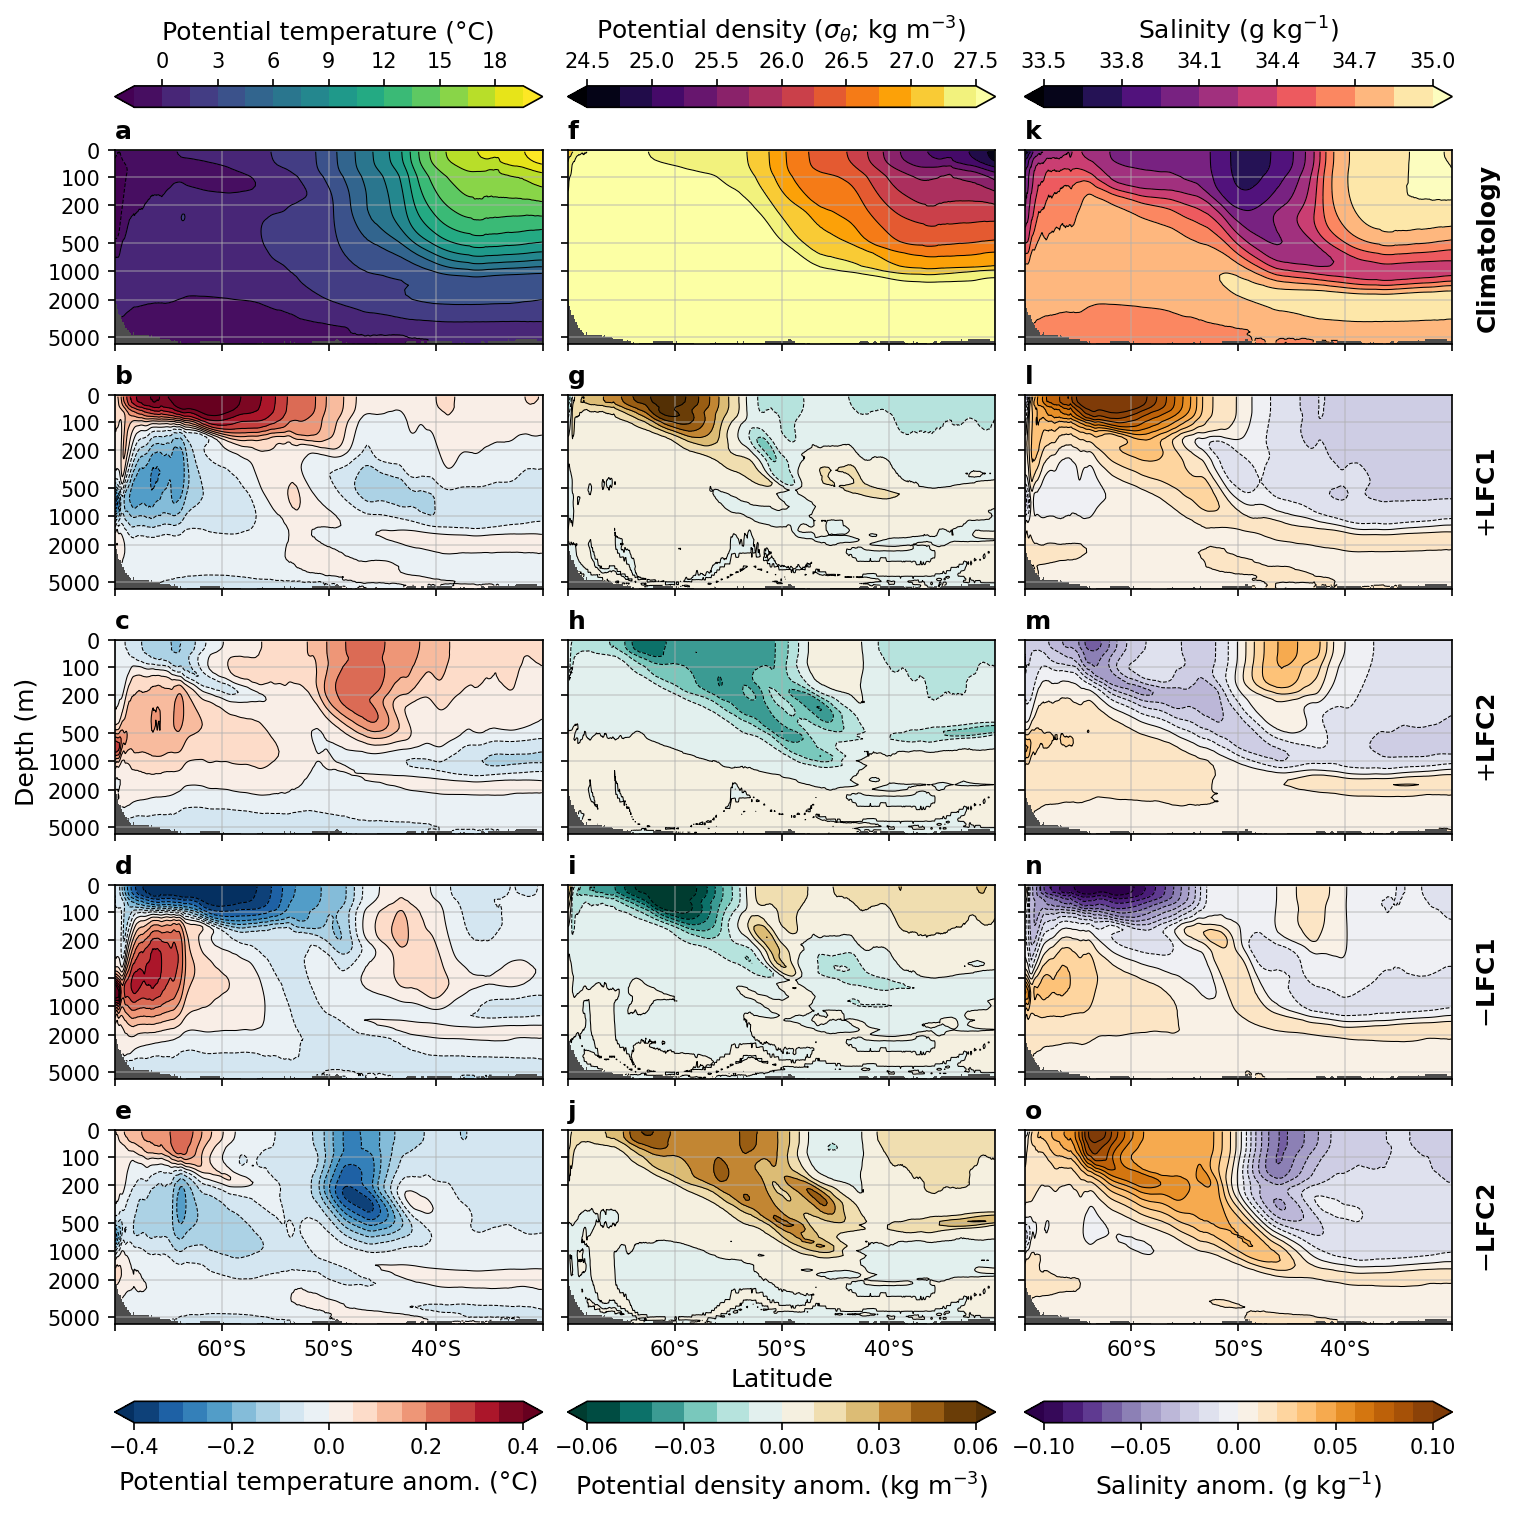

In [14]:
fig4, ax4 = plt.subplots(5, 3, dpi=150, figsize=(10, 10), layout='constrained')

tlvl = np.arange(-0.4, 0.41, 0.05)
slvl = np.arange(-0.1, 0.11, 0.01)
ilvl = np.array([-15., -10., -5., 5., 10., 15.])
dlvl = np.arange(-0.06, 0.061, 0.01)
tcmap = plt.cm.RdBu_r
scmap = plt.cm.PuOr_r
dcmap = plt.cm.BrBG_r

t_clim_cf = ax4[0, 0].contourf(lats, z, t_clim, cmap='viridis', levels=15, extend='both')
ax4[0, 0].contourf(lats, z, t_clim, cmap='viridis', levels=15, extend='both')

ax4[0, 0].contour(lats, z, t_clim, colors='k', levels=15, linewidths=0.5)
d_clim_cf = ax4[0, 1].contourf(lats, z, d_clim, cmap='inferno', levels=np.arange(24.5, 27.51, 0.25), extend='both')
ax4[0, 1].contour(lats, z, d_clim, colors='k', levels=np.arange(24.5, 27.51, 0.25), linewidths=0.5)
es_clim_cf = ax4[0, 2].contourf(lats, z, es_clim, cmap='magma', levels=np.arange(33.5, 35.1, 0.15), extend='both')
ax4[0, 2].contour(lats, z, es_clim, colors='k', levels=np.arange(33.5, 35.1, 0.15), linewidths=0.5)

t_cf = ax4[1, 0].contourf(lats, z, temp_pos1, cmap=tcmap, levels=tlvl, extend='both')
ax4[1, 0].contour(lats, z, temp_pos1, colors='k', levels=tlvl, linewidths=0.5)
d_cf = ax4[1, 1].contourf(lats, z, dens_pos1, cmap=dcmap, levels=dlvl, extend='both')
ax4[1, 1].contour(lats, z, dens_pos1, colors='k', levels=dlvl, linewidths=0.5)
s_cf = ax4[1, 2].contourf(lats, z, esalt_pos1, cmap=scmap, levels=slvl, extend='both')
ax4[1, 2].contour(lats, z, esalt_pos1, colors='k', levels=slvl, linewidths=0.5)

ax4[2, 0].contourf(lats, z, temp_pos2, cmap=tcmap, levels=tlvl, extend='both')
ax4[2, 0].contour(lats, z, temp_pos2, colors='k', levels=tlvl, linewidths=0.5)
ax4[2, 1].contourf(lats, z, dens_pos2, cmap=dcmap, levels=dlvl, extend='both')
ax4[2, 1].contour(lats, z, dens_pos2, colors='k', levels=dlvl, linewidths=0.5)
ax4[2, 2].contourf(lats, z, esalt_pos2, cmap=scmap, levels=slvl, extend='both')
ax4[2, 2].contour(lats, z, esalt_pos2, colors='k', levels=slvl, linewidths=0.5)

ax4[3, 0].contourf(lats, z, temp_neg1, cmap=tcmap, levels=tlvl, extend='both')
ax4[3, 0].contour(lats, z, temp_neg1, colors='k', levels=tlvl, linewidths=0.5)
ax4[3, 1].contourf(lats, z, dens_neg1, cmap=dcmap, levels=dlvl, extend='both')
ax4[3, 1].contour(lats, z, dens_neg1, colors='k', levels=dlvl, linewidths=0.5)
ax4[3, 2].contourf(lats, z, esalt_neg1, cmap=scmap, levels=slvl, extend='both')
ax4[3, 2].contour(lats, z, esalt_neg1, colors='k', levels=slvl, linewidths=0.5)

ax4[4, 0].contourf(lats, z, temp_neg2, cmap=tcmap, levels=tlvl, extend='both')
ax4[4, 0].contour(lats, z, temp_neg2, colors='k', levels=tlvl, linewidths=0.5)
ax4[4, 1].contourf(lats, z, dens_neg2, cmap=dcmap, levels=dlvl, extend='both')
ax4[4, 1].contour(lats, z, dens_neg2, colors='k', levels=dlvl, linewidths=0.5)
ax4[4, 2].contourf(lats, z, esalt_neg2, cmap=scmap, levels=slvl, extend='both')
ax4[4, 2].contour(lats, z, esalt_neg2, colors='k', levels=slvl, linewidths=0.5)

sp_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
for i, ax in enumerate(ax4.flatten('F')):
    ax.set_xlim(-70, -30)
    ax.grid(alpha=0.5)
    ax.set_yscale('symlog', linthresh=100e2, linscale=0.25)
    # ax.set_ylim(1, 2000e2)
    ax.set_facecolor('0.3')
    ax.invert_yaxis()
    ax.set_title(sp_labels[i], fontweight='bold', color='k', loc='left')
    # ax.annotate(sp_labels[i], xy=(0.94, 0.05), xycoords='axes fraction', fontweight='bold', color='k')

for ax in ax4[:, 0]:
    ax.set_yticks([0, 100e2, 200e2, 500e2, 1000e2, 2000e2, 5000e2], ['0', '100', '200', '500', '1000', '2000', '5000'])

for ax in ax4[:, 1:].flatten():
    ax.set_yticks([0, 100e2, 200e2, 500e2, 1000e2, 2000e2, 5000e2], [])

for ax in ax4[0:4, :].flatten():
    ax.set_xticklabels([])

for ax in ax4[4, :]:
    ax.set_xticks([-70, -60, -50, -40, -30], ['', '60°S', '50°S', '40°S', ''])

t_clim_cb = plt.colorbar(t_clim_cf, ax=ax4[0, 0], location='top', pad=0.06)
t_clim_cb.set_label(label='Potential temperature (°C)', labelpad=6, size=12)
d_clim_cb = plt.colorbar(d_clim_cf, ax=ax4[0, 1], location='top', pad=0.06)
d_clim_cb.set_label(label=r'Potential density ($\sigma_\theta$; kg m$^{-3}$)', labelpad=6, size=12)
s_clim_cb = plt.colorbar(es_clim_cf, ax=ax4[0, 2], location='top', pad=0.06)
s_clim_cb.set_label(label='Salinity (g kg$^{-1}$)', labelpad=6, size=12)

t_cb = plt.colorbar(t_cf, ax=ax4[4, 0], location='bottom', pad=0.05, ticks=[-0.4, -0.2, 0.0, 0.2, 0.4])
t_cb.set_label(label='Potential temperature anom. (°C)', labelpad=6, size=12)
d_cb = plt.colorbar(d_cf, ax=ax4[4, 1], location='bottom', pad=0.05, ticks=[-0.06, -0.03, 0.00, 0.03, 0.06])
d_cb.set_label(label='Potential density anom. (kg m$^{-3}$)', labelpad=6, size=12)
s_cb = plt.colorbar(s_cf, ax=ax4[4, 2], location='bottom', pad=0.05, ticks=[-0.1, -0.05, 0.00, 0.05, 0.1])
s_cb.set_label(label='Salinity anom. (g kg$^{-1}$)', labelpad=6, size=12)

# ax4[0, 0].set_title('60°W–60°E', fontweight='bold')
# ax4[0, 1].set_title('60°W–0°E (West of MR)', fontweight='bold')
# ax4[0, 2].set_title('0°E–60°E (East of MR)', fontweight='bold')

ax4[2, 0].set_ylabel('Depth (m)', y=0.48, size=12)
ax4[4, 1].set_xlabel('Latitude', size=12)
ax4[0, 2].set_ylabel('Climatology', labelpad=-235.0, fontweight='bold', size=12)
ax4[1, 2].set_ylabel('$+$LFC1', labelpad=-235.0, fontweight='bold', size=12)
ax4[2, 2].set_ylabel('$+$LFC2', labelpad=-235.0, fontweight='bold', size=12)
ax4[3, 2].set_ylabel('$-$LFC1', labelpad=-235.0, fontweight='bold', size=12)
ax4[4, 2].set_ylabel('$-$LFC2', labelpad=-235.0, fontweight='bold', size=12)

In [15]:
fig4.savefig('zm-log-fulldepth.pdf')

In [16]:
ds_taux = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-60W60ESO-TAUX-full.nc').sel(nlat=slice(180, None))

In [17]:
zm_taux = ds_taux.TAUX.mean(dim='nlon').compute()

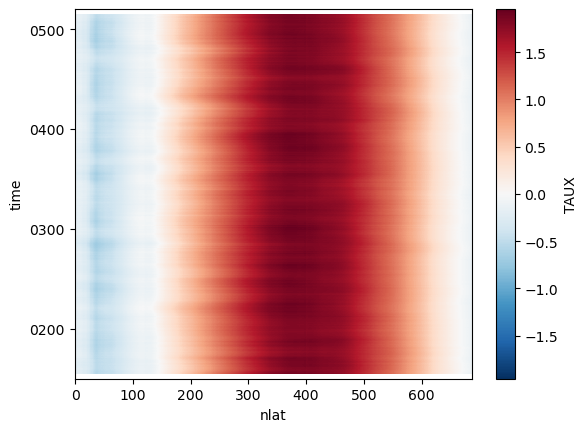

In [18]:
zm_taux.rolling(time=120, center=True).mean().plot()

In [19]:
zm_taux_clim = zm_taux.mean(dim='time')

In [20]:
taux_pos1 = zm_taux.sel(time=pos_lfc1).mean(dim='time').compute()
taux_pos2 = zm_taux.sel(time=pos_lfc2).mean(dim='time').compute()
taux_neg1 = zm_taux.sel(time=neg_lfc1).mean(dim='time').compute()
taux_neg2 = zm_taux.sel(time=neg_lfc2).mean(dim='time').compute()

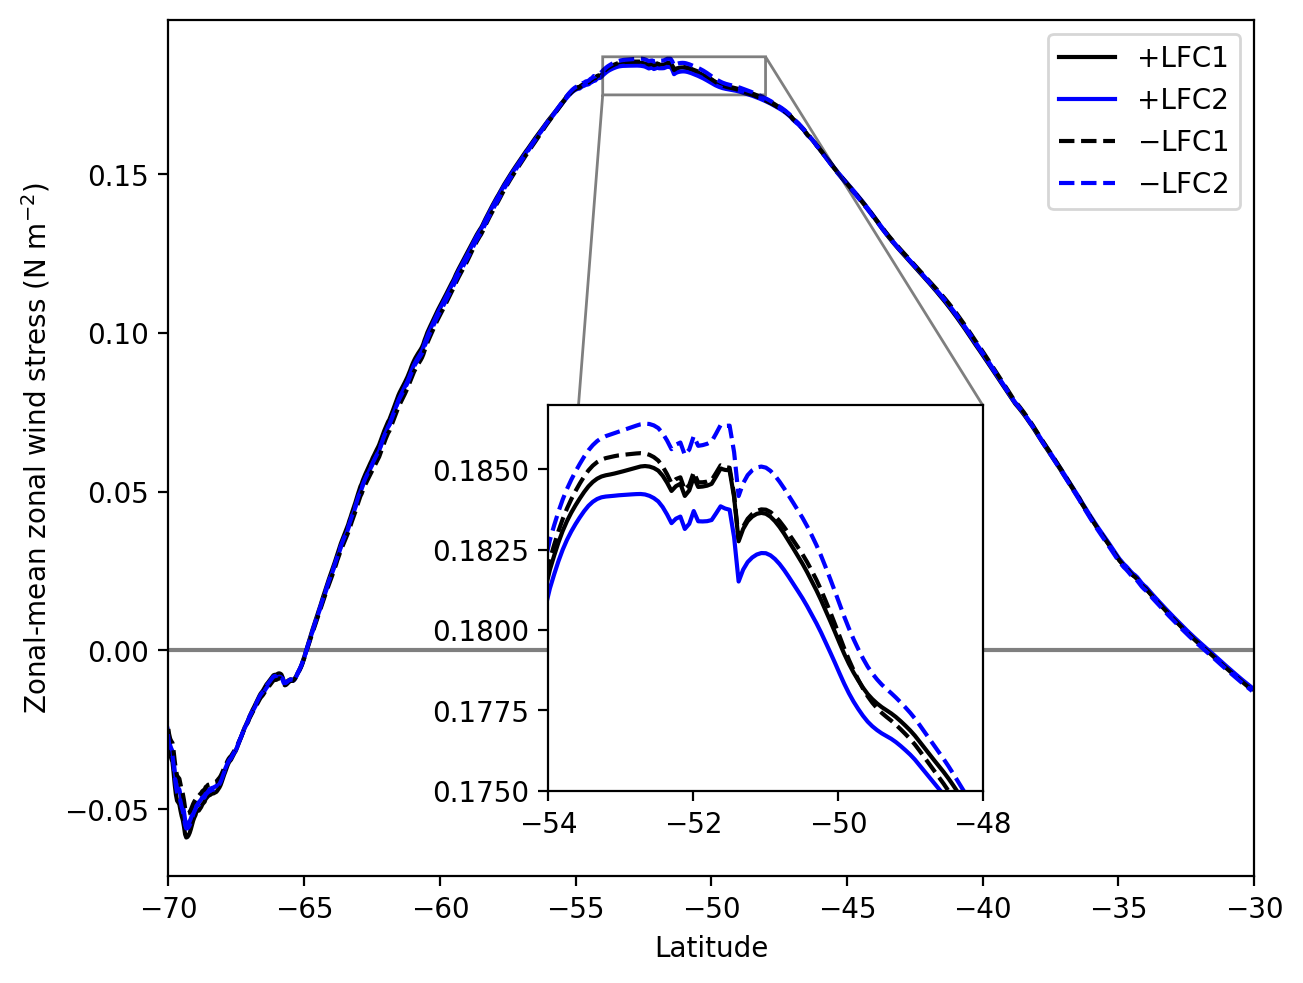

In [21]:
figt, ax = plt.subplots(dpi=200, layout='constrained')
ax.axhline(0, color='k', alpha=0.5)
ax.plot(lats, 0.1*taux_pos1, color='k', label='+LFC1')
ax.plot(lats, 0.1*taux_pos2, color='b', label='+LFC2')
ax.plot(lats, 0.1*taux_neg1, color='k', linestyle='--', label='$-$LFC1')
ax.plot(lats, 0.1*taux_neg2, color='b', linestyle='--', label='$-$LFC2')
ax.set_ylabel('Zonal-mean zonal wind stress (N m$^{-2}$)')
ax.set_xlabel('Latitude')
ax.set_xlim(-70, -30)
plt.legend()

axins = ax.inset_axes(
    [0.35, 0.1, 0.4, 0.45],
    xlim=(-54, -48), ylim=(0.175, 0.187))

axins.plot(lats, 0.1*taux_pos1, color='k')
axins.plot(lats, 0.1*taux_pos2, color='b')
axins.plot(lats, 0.1*taux_neg1, color='k', linestyle='--')
axins.plot(lats, 0.1*taux_neg2, color='b', linestyle='--')

ax.indicate_inset_zoom(axins, edgecolor="black")

In [22]:
figt.savefig('si-tau.pdf')

In [23]:
# ds_ssh = xr.open_dataset('/roselab_rit/rford/iHESP-data/HRCESM-60W60ESO-SSH-full.nc')

In [24]:
# ssh_clim = ds_ssh.SSH.mean(dim='time').compute()
# ssh_pos1 = ds_ssh.SSH.sel(time=pos_lfc1).mean(dim='time').compute()
# ssh_pos2 = ds_ssh.SSH.sel(time=pos_lfc2).mean(dim='time').compute()
# ssh_neg1 = ds_ssh.SSH.sel(time=neg_lfc1).mean(dim='time').compute()
# ssh_neg2 = ds_ssh.SSH.sel(time=neg_lfc2).mean(dim='time').compute()

In [25]:
# ssh_clim.mean(dim='nlon').plot()

In [26]:
# ssh_clim.mean(dim='nlon').plot()
# (ssh_pos1 - ssh_clim).mean(dim='nlon').plot(color='k')
# (ssh_pos2 - ssh_clim).mean(dim='nlon').plot(color='b')
# (ssh_neg1 - ssh_clim).mean(dim='nlon').plot(color='k', linestyle='--')
# (ssh_neg2 - ssh_clim).mean(dim='nlon').plot(color='b', linestyle='--')